# IDB_drilling_monitoring_evaluation

## Import packages

In [1]:
import gc
import IPython
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.io as scio
import soundfile
import time
from keras.layers import Activation, BatchNormalization, Concatenate, Conv1D, Conv2D, Dense, Dropout, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalAveragePooling2D, Input, MaxPooling1D, MaxPooling2D
from keras.models import load_model, Model, Sequential
from keras.utils import to_categorical
from pyts.image import RecurrencePlot, MarkovTransitionField, GramianAngularField
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tqdm import tqdm

!nvidia-smi
HOST_path = "/root/autodl-tmp"

SETS_path = os.path.join(HOST_path, "IDB_drilling_monitoring/datasets")
SAVE_path = os.path.join(HOST_path, "IDB_drilling_monitoring/predict")

if not os.path.exists(SAVE_path):
    os.makedirs(SAVE_path)

2023-10-22 16:04:26.759503: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Sun Oct 22 16:04:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:32:00.0 Off |                  Off |
| 30%   29C    P8    26W / 450W |      2MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import datasets

In [2]:
X_set = np.load(os.path.join(SETS_path, "X_set.npy"))
X_set_cnn = np.load(os.path.join(SETS_path, "X_set_cnn.npy"))
Y_set = np.load(os.path.join(SETS_path, "Y_set.npy"))

print(X_set.shape)
print(X_set_cnn.shape)
print(Y_set.shape)

(35524, 12000)
(35524, 12000, 1)
(35524, 7)


In [3]:
ALL7 = np.load(os.path.join(SETS_path, "ALL7.npy"))
ALL6 = np.load(os.path.join(SETS_path, "ALL6.npy"))
HEIGHT = np.load(os.path.join(SETS_path, "HEIGHT.npy"))
RPM = np.load(os.path.join(SETS_path, "RPM.npy"))
TORQUE = np.load(os.path.join(SETS_path, "TORQUE.npy"))
PUMPR = np.load(os.path.join(SETS_path, "PUMPR.npy"))
PUMPP = np.load(os.path.join(SETS_path, "PUMPP.npy"))
ROP = np.load(os.path.join(SETS_path, "ROP.npy"))
WOB = np.load(os.path.join(SETS_path, "WOB.npy"))

print(ALL7.shape)
print(ALL6.shape)
print(HEIGHT.shape)
print(RPM.shape)
print(TORQUE.shape)
print(PUMPR.shape)
print(PUMPP.shape)
print(ROP.shape)
print(WOB.shape)

(35524, 7)
(35524, 6)
(35524,)
(35524,)
(35524,)
(35524,)
(35524,)
(35524,)
(35524,)


### Evaluation

#### group

In [4]:
DATA = "WOB"

In [5]:
DATA_path = os.path.join(SAVE_path, DATA)

if not os.path.exists(DATA_path):
    os.makedirs(DATA_path)

In [6]:
INPUT = X_set_cnn
OUTPUT = eval(DATA)

In [7]:
if OUTPUT.ndim == 1:
    num_targets = 1
else:
    num_targets = OUTPUT.shape[1]

x_train, x_test, y_train, y_test = train_test_split(INPUT, OUTPUT, test_size=0.25, random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(num_targets)

(26643, 12000, 1)
(26643,)
(8881, 12000, 1)
(8881,)
1


In [8]:
model = load_model(os.path.join(HOST_path, "IDB_drilling_monitoring/outputs/outputs_"+DATA+"/best_model.hdf5"))

2023-10-22 16:04:33.712389: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-22 16:04:34.250792: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22128 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:32:00.0, compute capability: 8.9


#### Show and Save

In [9]:
hist = np.load((os.path.join(HOST_path, "IDB_drilling_monitoring/outputs/outputs_"+DATA+"/history.npy")), allow_pickle=True).item()

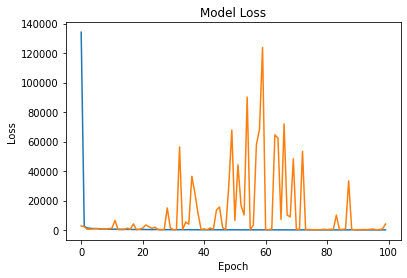

In [10]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Test set'], loc='upper right')
plt.savefig(os.path.join(SAVE_path, "loss1.png"), dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train set', 'Test set'], loc='upper right')
plt.savefig(os.path.join(SAVE_path, "loss2.png"), dpi=300, bbox_inches='tight', transparent=True)
plt.show()